### KNN: Wine Type Classification

Load Dataset

In [3]:
from sklearn.datasets import load_wine

# Load the wine dataset
wine = load_wine(as_frame=True)

# Convert to DataFrame
df_data = wine.frame
df_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


Counting Samples per Class

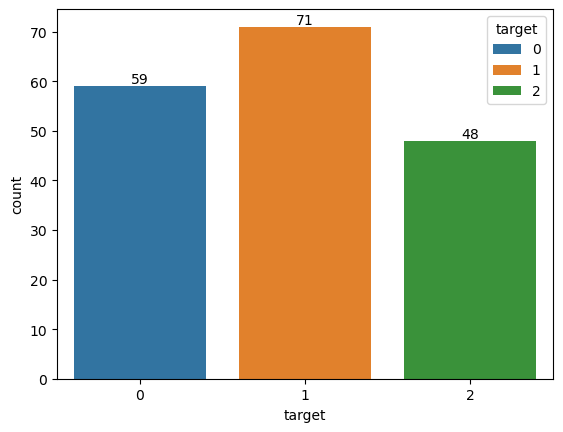

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use seaborn's countplot() to draw the bar chart
ax = sns.countplot(data=df_data, x='target', hue='target', palette='tab10')

# Annotate each bar with count values
for container in ax.containers:
    ax.bar_label(container)

This generates a bar chart displaying:
- Class 0: 59 samples
- Class 1: 71 samples
- Class 2: 48 samples

Histograms of All Features

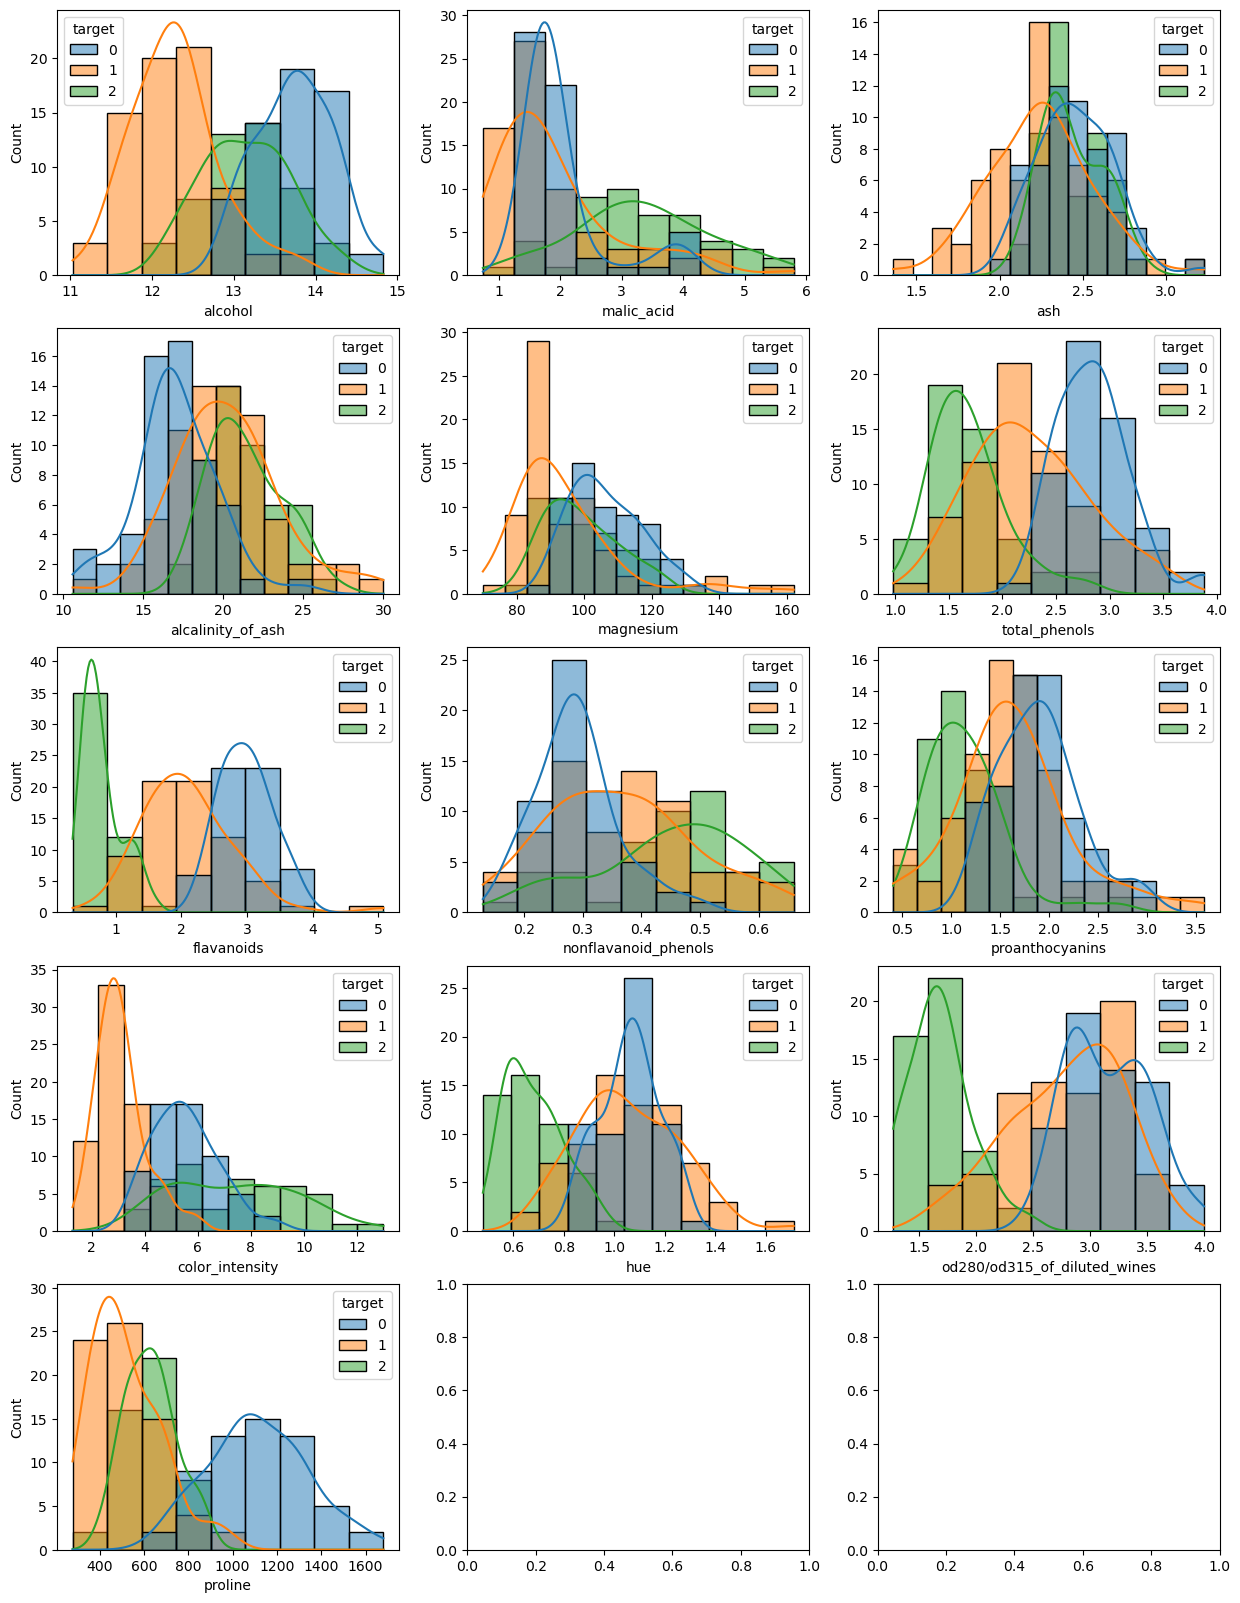

In [8]:
# Define feature names
x_feature_names = wine['feature_names']

# Create subplot grid
fig, axes = plt.subplots(5, 3, figsize=(15, 20))

# Draw histogram for each feature
for ax, name in zip(axes.flatten(), x_feature_names):
    sns.histplot(data=df_data, x=name, hue="target", kde=True, palette="tab10", ax=ax)

> Based on the visualizations:
> - Features like `Alcohol`, `Total phenols`, and `Flavanoids` show clear separation among different wine classes.
> - These features may serve as key variables for classification.

Splitting the Dataset into Training and Testing Sets

In [17]:
from sklearn.model_selection import train_test_split

X = df_data.drop('target', axis=1)
y = df_data['target']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Shape of training set X:', X_train.shape)
print('Shape of testing set X:', X_test.shape)


Shape of training set X: (124, 13)
Shape of testing set X: (54, 13)


Feature Standardization

In [18]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


> `StandardScaler` standardizes each feature by subtracting the mean and dividing by the standard deviation.

Build and Train KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)


Evaluating the Model

In [20]:
train_accuracy = knn_model.score(X_train, y_train)
test_accuracy = knn_model.score(X_test, y_test)

print('Training Accuracy:', train_accuracy)
print('Testing Accuracy:', test_accuracy)

Training Accuracy: 0.9516129032258065
Testing Accuracy: 0.9629629629629629


> Both training and testing accuracy suggests the model performs well and is not significantly overfitting.

Confusion Matrix

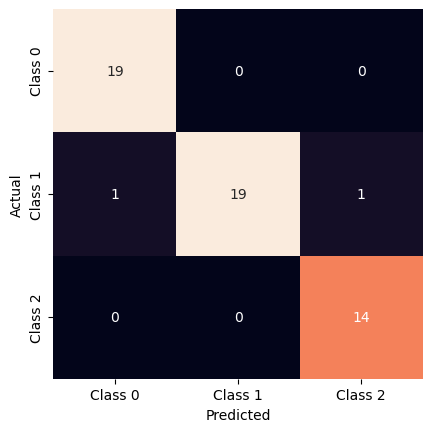

In [21]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(actual, pred, labels):
    # Generate matrix
    confusion_matrix = pd.crosstab(actual, pred, rownames=['Actual'], colnames=['Predicted'])

    # Plot heatmap
    sns.heatmap(confusion_matrix, xticklabels=labels, yticklabels=labels,
                square=True, annot=True, cbar=False)

# Call the function
y_label_names = ['Class 0', 'Class 1', 'Class 2']
plot_confusion_matrix(y_test, y_pred, labels=y_label_names)


>- The model performs very well for Class 0 and Class 2, with no misclassifications.
>- For Class 1, some confusion remains.
>- Improvement tip: Analyze misclassified Class 1 samples in more detail to boost performance.